<a href="https://colab.research.google.com/github/AeroEng16/FootballAnalysis/blob/main/SAHIForBallDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAHI

In [7]:
! git clone https://github.com/vcg-uvic/sportsfield_release

Cloning into 'sportsfield_release'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 98 (delta 7), reused 4 (delta 4), pack-reused 88 (from 1)
Receiving objects: 100% (98/98), 37.81 MiB | 23.75 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [28]:
!source activate myenv && conda env list -f /content/sportsfield_release/environment.yml

/bin/bash: line 1: activate: No such file or directory


In [5]:
import sys

import cv2
import os

import numpy as np
import torch
import imageio
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm_notebook as tqdm


preppingImages = False

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from sahi.predict import get_sliced_prediction
from sahi import AutoDetectionModel
from sahi.predict import get_prediction, get_sliced_prediction, predict

# init any model


detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path="bestBallSoFar_0409.pt",
    confidence_threshold=0.01,
    device="cuda:0", # or 'cuda:0'
)

prediction = predict(
    model_type='yolov8',
    model_path="bestBallSoFar_0409.pt",
    model_device="cuda:0",
    model_confidence_threshold=0.01,
    source="testFrames",
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
    project = "ballPrediction",
    name="firstTesting",
    export_pickle=True
)



In [ ]:
import pickle

dbfile = open(r"D:\FootballAnalysis\FootballAnalysis\ballPrediction\firstTesting4\pickles\frame3.pickle".replace("\\","/"),'rb')
db = pickle.load(dbfile)


ObjectPrediction<
    bbox: BoundingBox: <(1198.849105834961, 858.1821098327637, 1215.5352172851562, 877.3453941345215), w: 16.686111450195312, h: 19.163284301757812>,
    mask: None,
    score: PredictionScore: <value: 0.6864193081855774>,
    category: Category: <id: 0, name: ball>>
ObjectPrediction<
    bbox: BoundingBox: <(372.96112, 304.73773, 403.05533, 360.78998), w: 30.094207763671875, h: 56.05224609375>,
    mask: None,
    score: PredictionScore: <value: 0.37592369318008423>,
    category: Category: <id: 0, name: ball>>
ObjectPrediction<
    bbox: BoundingBox: <(1237.6412, 434.16074, 1266.781, 482.4332), w: 29.1397705078125, h: 48.2724609375>,
    mask: None,
    score: PredictionScore: <value: 0.3421994149684906>,
    category: Category: <id: 0, name: ball>>
ObjectPrediction<
    bbox: BoundingBox: <(783.570556640625, 369.6738739013672, 792.2418975830078, 383.21124267578125), w: 8.671340942382812, h: 13.537368774414062>,
    mask: None,
    score: PredictionScore: <value: 0.

In [ ]:

if prepingImages = True:

  rom sahi.slicing import slice_coco

  coco_dict, coco_path = slice_coco(
      output_coco_annotation_file_name="D:/FootballAnalysis/FootballAnalysis/ballDetect4Coco/splitImages/test/labels.json",
      coco_annotation_file_path="D:/FootballAnalysis/FootballAnalysis/ballDetect4Coco/test/labels.json",
      output_dir = "D:/FootballAnalysis/FootballAnalysis/ballDetect4Coco/splitImages/test/data",
      image_dir="D:/FootballAnalysis/FootballAnalysis/ballDetect4Coco/test/data",
      slice_height=256,
      slice_width=256,
      overlap_height_ratio=0.2,
      overlap_width_ratio=0.2,
  )

ModuleNotFoundError: No module named 'sahi'

# Pitch Detection and Transformation


In [9]:

try:
  from roboflow import Roboflow
except ImportError:
  !pip install roboflow
  from roboflow import Roboflow

from google.colab.patches import cv2_imshow

ROBOFLOW_API_KEY = "e4YWipTNVce3CfUmX7fc"
try:
  import supervision as sv
  from inference import get_model
except ImportError:
  !pip install supervision
  !pip install inference
  import supervision as sv
  from inference import get_model

model = get_model(
    model_id="football-field-detection-f07vi/14",
    api_key=ROBOFLOW_API_KEY
)


Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
Specified provider 'OpenVINOExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'


NameError: name 'cvs_imshow' is not defined

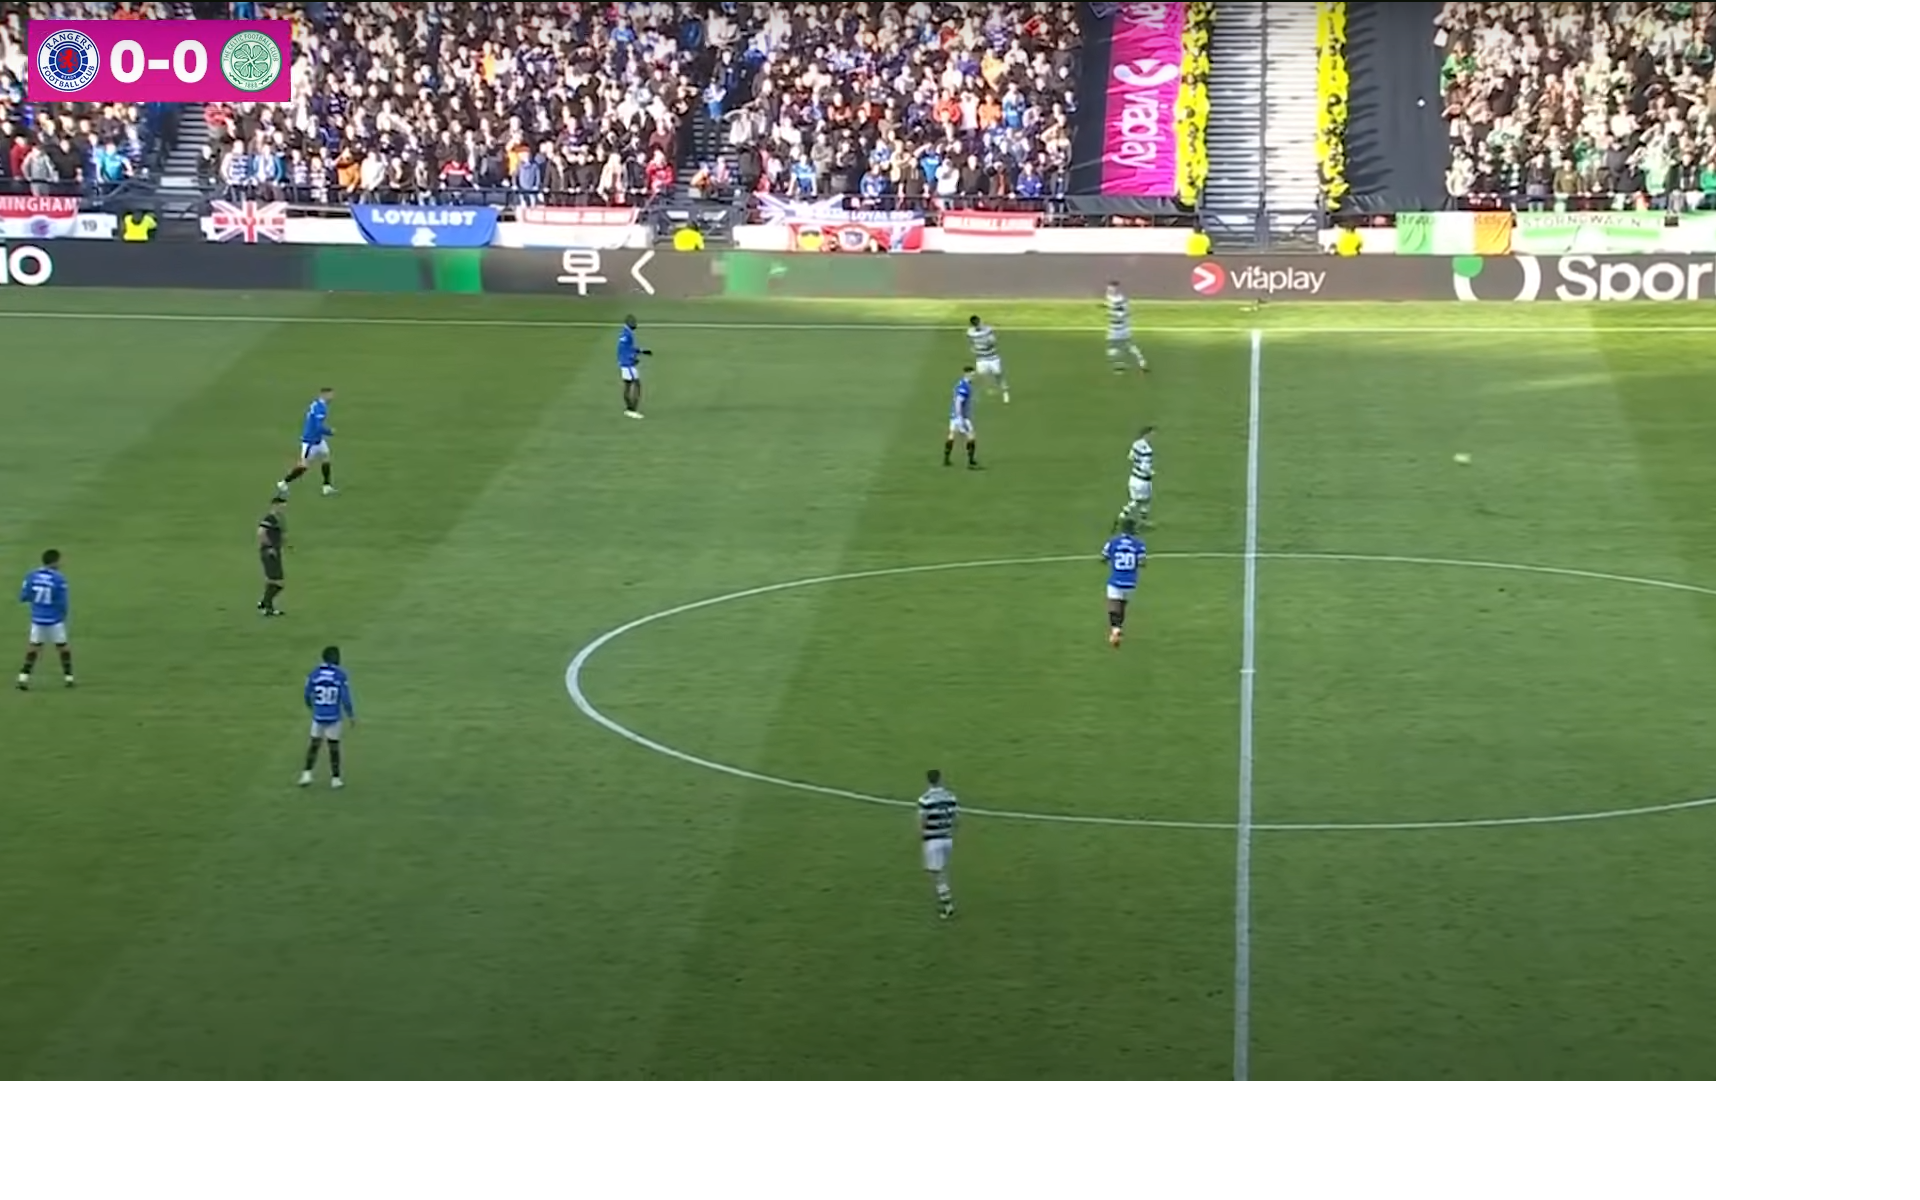

In [14]:

image = cv2.imread("/content/oldFirmTestImage.png")
cv2_imshow(image)

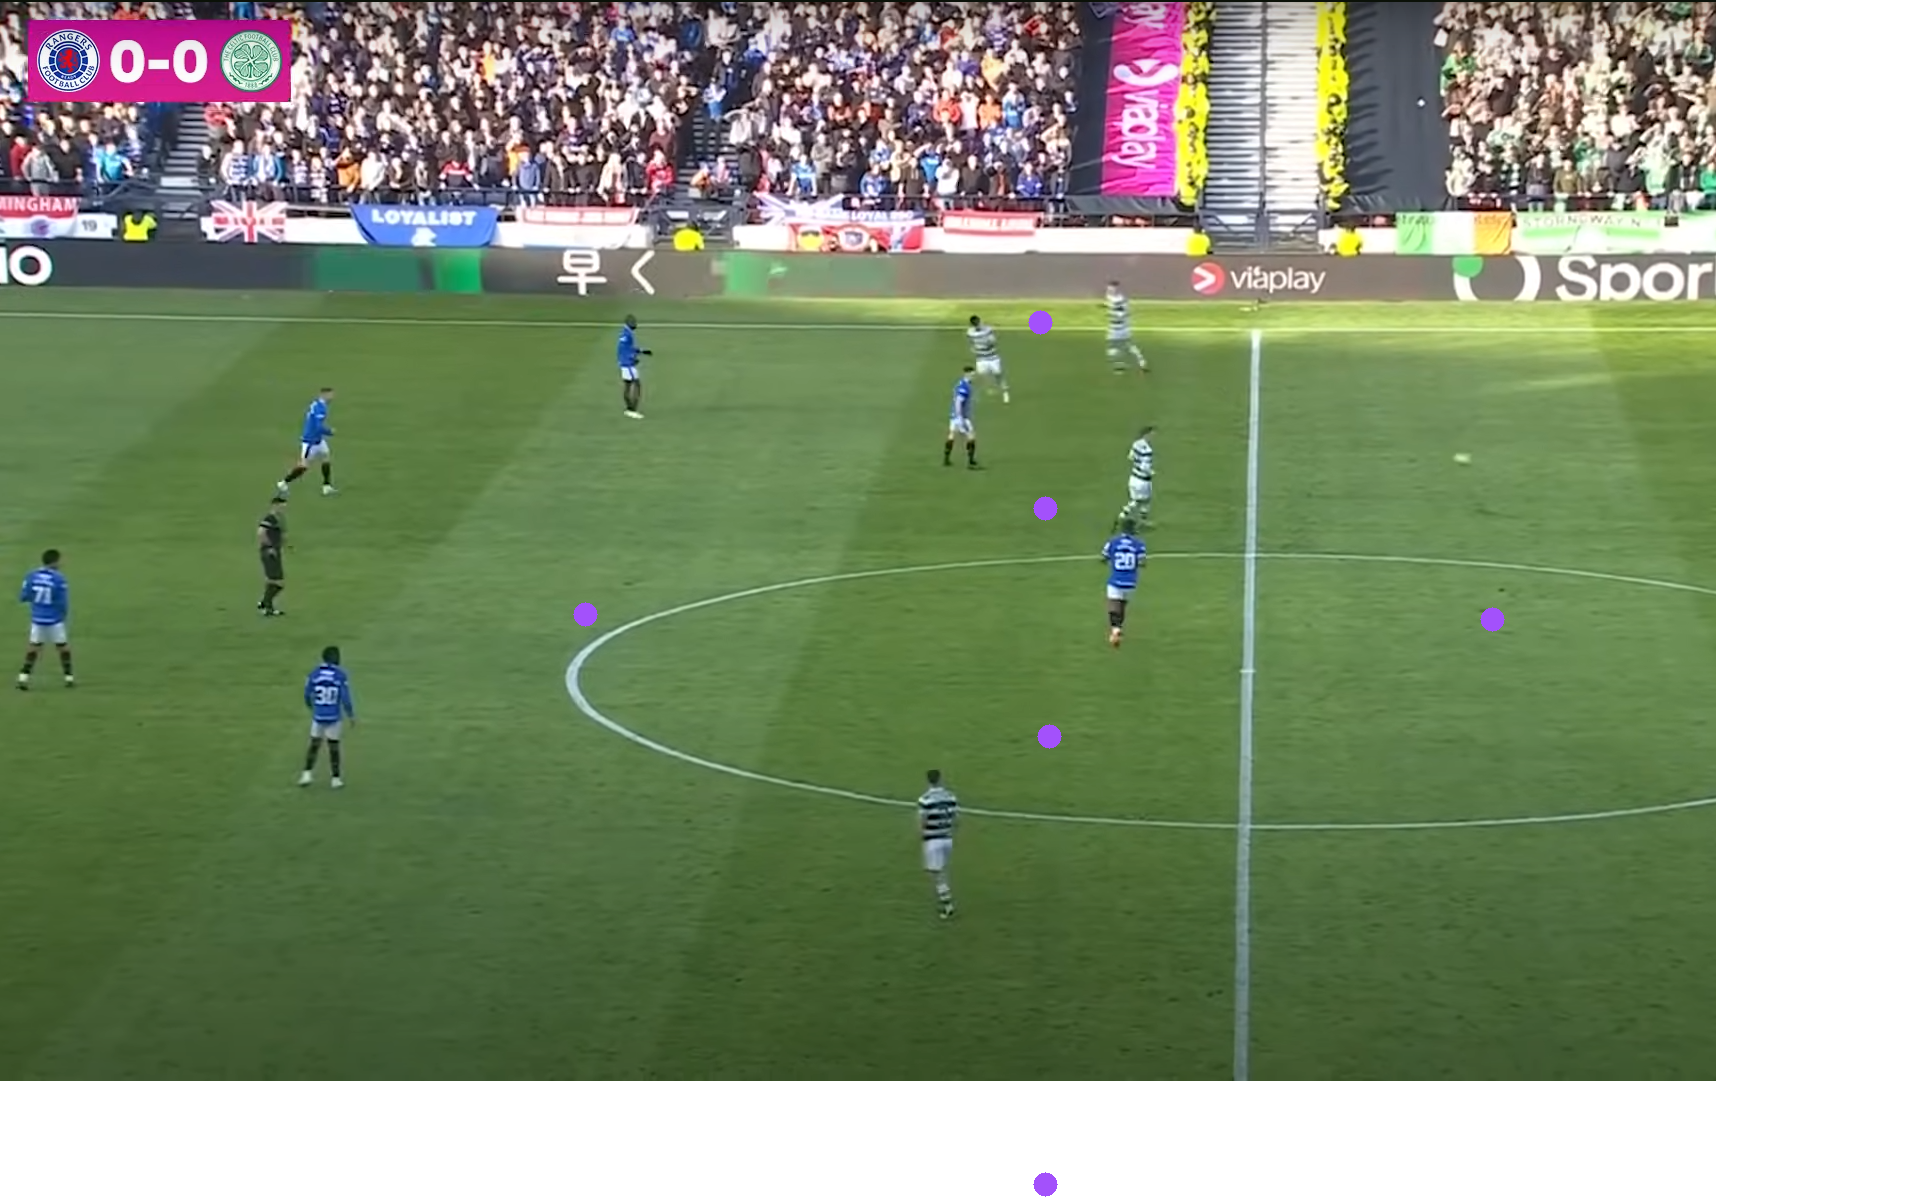

In [15]:
result = model.infer(image, confidence=0.3)[0]

keypoints = sv.KeyPoints.from_inference(result)

filter = keypoints.confidence > 0.5
keypoints.xy = keypoints.xy[filter][np.newaxis]
keypoints.confidence = keypoints.confidence[filter][np.newaxis]

vertex_annotator = sv.VertexAnnotator(radius=12)
annotated_image = vertex_annotator.annotate(image.copy(), keypoints)


cv2_imshow(annotated_image)

In [12]:
print(result)

[KeypointsDetectionInferenceResponse(visualization=None, inference_id=None, frame_id=None, time=None, image=InferenceResponseImage(width=640, height=640), predictions=[])]


In [ ]:
import cv2
import numpy as np

class ViewTransformer:
    def __init__(self, source: np.ndarray, target: np.ndarray) -> None:
        if source.shape != target.shape:
            raise ValueError(
                "Source and target must have the same shape.")
        if source.shape[1] != 2:
            raise ValueError(
                "Source and target points must be 2D coordinates.")

        source = source.astype(np.float32)
        target = target.astype(np.float32)

        self.m, _ = cv2.findHomography(source, target)
        if self.m is None:
            raise ValueError(
                "Homography matrix could not be calculated.")

    def transform_points(self, points: np.ndarray) -> np.ndarray:
        if points.size == 0:
            return points

        if points.shape[1] != 2:
            raise ValueError("Points must be 2D coordinates.")

        points = points.reshape(-1, 1, 2).astype(np.float32)
        points = cv2.perspectiveTransform(points, self.m)
        return points.reshape(-1, 2).astype(np.float32)